In [1]:
# As usual, a bit of setup

import numpy as np
import matplotlib.pyplot as plt
#from cs231n.classifiers.cnn import *
from cs231n.data_utils import get_CIFAR10_data
from cs231n.gradient_check import eval_numerical_gradient_array, eval_numerical_gradient
#from cs231n.layers import *
#from cs231n.fast_layers import *
#from cs231n.solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-re|loading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [2]:
def limit_mem():
    import keras.backend as K
    K.get_session().close()
    cfg = K.tf.ConfigProto()
    cfg.gpu_options.allow_growth = True
    K.set_session(K.tf.Session(config=cfg))

In [ ]:
#imit_mem()

In [3]:
data = get_CIFAR10_data()
for k, v in data.items():
  print('%s: ' % k, v.shape)

cs231n/datasets/cifar-10-batches-py/data_batch_1
cs231n/datasets/cifar-10-batches-py/data_batch_2
cs231n/datasets/cifar-10-batches-py/data_batch_3
cs231n/datasets/cifar-10-batches-py/data_batch_4
cs231n/datasets/cifar-10-batches-py/data_batch_5
X_train:  (49000, 3, 32, 32)
y_train:  (49000,)
X_val:  (1000, 3, 32, 32)
y_val:  (1000,)
X_test:  (1000, 3, 32, 32)
y_test:  (1000,)


In [4]:
X = data['X_train'][:1000]
y = data['y_train'][:1000]


In [ ]:
import tensorflow as tf

In [ ]:
#tf.reshape(X, [-1, 32, 32, ])

In [ ]:
from cs231n.classifiers.conv_net_tf import cnn_model, BATCH_SIZE, put_channel_last

 1. fc  -> softmax ->   backprop
 2.
 2. conv - relu - 2x2 max pool - affine - relu - affine - softmax

In [ ]:
tf.logging.set_verbosity(tf.logging.INFO)

In [ ]:
%%capture
tensors_to_log = {"total_loss": "total_loss"}
logging_hook = tf.train.LoggingTensorHook(
  tensors=tensors_to_log, every_n_iter=50)

!rm -rf tf_logs/
!mkdir tf_logs
tf.logging.set_verbosity(0)
clf = tf.estimator.Estimator(cnn_model, model_dir='tf_logs')
train_input_func = tf.estimator.inputs.numpy_input_fn(
    x={'x': put_channel_last(X)}, y=y,
    batch_size=BATCH_SIZE, shuffle=True, num_epochs=20)
tf.logging.set_verbosity(tf.logging.INFO)
clf.train(input_fn=train_input_func, steps=10, 
         hooks=[logging_hook]
         )

In [ ]:
#preds = clf.predict(train_input_func)

In [ ]:
eval_input_fn = tf.estimator.inputs.numpy_input_fn(
x={'x': put_channel_last(X)}, y=y, num_epochs=1,batch_size=BATCH_SIZE,
    shuffle=False)
eval_results= clf.evaluate(input_fn=eval_input_fn); eval_results

In [5]:
import torch


In [6]:
from cs231n.classifiers.conv_net import train_torchnet

In [58]:
%%time
scores = {}
train_loss = {}
for filter_size in [1, 3, 5, 7, 9]:
    model = train_torchnet(data['X_train'], data['y_train'],
                             num_epochs=5, weight_decay=.001,
                             print_every=200,
                             X_val=data['X_val'], y_val=data['y_val'],
                             filter_size=filter_size,
                            use_cuda=True)
    scores[filter_size] = model.val_scores
    train_loss[filter_size] = model.train_loss

  0%|          | 0/5 [00:00<?, ?it/s]

38 11552
0.15
0.223


 20%|██        | 1/5 [00:06<00:27,  6.78s/it]

0.279
0.269


 40%|████      | 2/5 [00:13<00:20,  6.77s/it]

0.328
0.347
0.339


 60%|██████    | 3/5 [00:20<00:13,  6.83s/it]

0.357
0.325


 80%|████████  | 4/5 [00:27<00:06,  6.88s/it]

0.365
0.367
0.395


  0%|          | 0/5 [00:00<?, ?it/s]

36 10368
0.108
0.233


 20%|██        | 1/5 [00:06<00:27,  6.95s/it]

0.272
0.302


 40%|████      | 2/5 [00:13<00:20,  6.95s/it]

0.356
0.354
0.372


 60%|██████    | 3/5 [00:20<00:13,  6.94s/it]

0.367
0.348


 80%|████████  | 4/5 [00:27<00:06,  6.92s/it]

0.366
0.373
0.376


  0%|          | 0/5 [00:00<?, ?it/s]

34 9248
0.23
0.291


 20%|██        | 1/5 [00:06<00:27,  6.90s/it]

0.306
0.364


 40%|████      | 2/5 [00:13<00:20,  6.88s/it]

0.38
0.379
0.414


 60%|██████    | 3/5 [00:20<00:13,  6.89s/it]

0.407
0.391


 80%|████████  | 4/5 [00:27<00:06,  6.85s/it]

0.465
0.461
0.502


  0%|          | 0/5 [00:00<?, ?it/s]

32 8192
0.128
0.157


 20%|██        | 1/5 [00:06<00:27,  6.84s/it]

0.192
0.255


 40%|████      | 2/5 [00:13<00:20,  6.85s/it]

0.286
0.281
0.264


 60%|██████    | 3/5 [00:20<00:13,  6.91s/it]

0.288
0.288


 80%|████████  | 4/5 [00:27<00:06,  6.89s/it]

0.278
0.285
0.248


  0%|          | 0/5 [00:00<?, ?it/s]

30 7200
0.208
0.21


 20%|██        | 1/5 [00:06<00:27,  6.80s/it]

0.211
0.275


 40%|████      | 2/5 [00:13<00:20,  6.80s/it]

0.27
0.297
0.309


 60%|██████    | 3/5 [00:20<00:13,  6.84s/it]

0.322
0.302


 80%|████████  | 4/5 [00:27<00:06,  6.82s/it]

0.309
0.335
0.347


100%|██████████| 5/5 [00:34<00:00,  6.85s/it]

CPU times: user 2min 51s, sys: 388 ms, total: 2min 52s
Wall time: 2min 52s


In [78]:
%%time

score_dct = {}
loss_dct = {}
for weight_decay in [1e-4, 1e-3, 1e-2, 1e-1]:
    model = train_torchnet(data['X_train'], data['y_train'],
                             num_epochs=3,
                            #n_batches=400,
                            weight_decay=weight_decay,
                             print_every=200,
                             X_val=data['X_val'], y_val=data['y_val'],
                             filter_size=5,
                            use_cuda=True)
    
    score_dct[weight_decay] = model.val_scores.copy()
    loss_dct[weight_decay] = model.train_loss.copy()
    del model
    print(score_dct)

  0%|          | 0/3 [00:00<?, ?it/s]

34 9248
0.493
0.558


 33%|███▎      | 1/3 [00:06<00:13,  6.74s/it]

0.605
0.604


 67%|██████▋   | 2/3 [00:13<00:06,  6.73s/it]

0.619
0.613
0.6


  0%|          | 0/3 [00:00<?, ?it/s]

{0.0001: {200: 0.493, 400: 0.558, 600: 0.605, 800: 0.604, 1000: 0.619, 1200: 0.613, 1400: 0.6}}
34 9248
0.507
0.542


 33%|███▎      | 1/3 [00:06<00:13,  6.73s/it]

0.592
0.588


 67%|██████▋   | 2/3 [00:13<00:06,  6.75s/it]

0.618
0.609
0.627


  0%|          | 0/3 [00:00<?, ?it/s]

{0.0001: {200: 0.493, 400: 0.558, 600: 0.605, 800: 0.604, 1000: 0.619, 1200: 0.613, 1400: 0.6}, 0.001: {200: 0.507, 400: 0.542, 600: 0.592, 800: 0.588, 1000: 0.618, 1200: 0.609, 1400: 0.627}}
34 9248
0.492
0.526


 33%|███▎      | 1/3 [00:06<00:13,  6.77s/it]

0.567
0.571


 67%|██████▋   | 2/3 [00:13<00:06,  6.77s/it]

0.589
0.595
0.582


  0%|          | 0/3 [00:00<?, ?it/s]

{0.0001: {200: 0.493, 400: 0.558, 600: 0.605, 800: 0.604, 1000: 0.619, 1200: 0.613, 1400: 0.6}, 0.001: {200: 0.507, 400: 0.542, 600: 0.592, 800: 0.588, 1000: 0.618, 1200: 0.609, 1400: 0.627}, 0.01: {200: 0.492, 400: 0.526, 600: 0.567, 800: 0.571, 1000: 0.589, 1200: 0.595, 1400: 0.582}}
34 9248
0.43
0.453


 33%|███▎      | 1/3 [00:06<00:13,  6.83s/it]

0.428
0.448


 67%|██████▋   | 2/3 [00:13<00:06,  6.87s/it]

0.445
0.439
0.455


100%|██████████| 3/3 [00:20<00:00,  6.92s/it]

{0.0001: {200: 0.493, 400: 0.558, 600: 0.605, 800: 0.604, 1000: 0.619, 1200: 0.613, 1400: 0.6}, 0.001: {200: 0.507, 400: 0.542, 600: 0.592, 800: 0.588, 1000: 0.618, 1200: 0.609, 1400: 0.627}, 0.01: {200: 0.492, 400: 0.526, 600: 0.567, 800: 0.571, 1000: 0.589, 1200: 0.595, 1400: 0.582}, 0.1: {200: 0.43, 400: 0.453, 600: 0.428, 800: 0.448, 1000: 0.445, 1200: 0.439, 1400: 0.455}}
CPU times: user 1min 22s, sys: 228 ms, total: 1min 22s
Wall time: 1min 22s


In [89]:
%%time
model = train_torchnet(data['X_train'], data['y_train'],
                             num_epochs=20,
                             # n_batches=10,
                             weight_decay=.001,
                             print_every=500,
                             X_val=data['X_val'], y_val=data['y_val'],
                             filter_size=5,
                             use_cuda=True)

  0%|          | 0/20 [00:00<?, ?it/s]

34 9248


  5%|▌         | 1/20 [00:06<02:05,  6.63s/it]

0.609


 10%|█         | 2/20 [00:13<01:59,  6.66s/it]

0.613


 15%|█▌        | 3/20 [00:20<01:53,  6.68s/it]

0.636


 20%|██        | 4/20 [00:26<01:47,  6.71s/it]

0.625


 25%|██▌       | 5/20 [00:33<01:41,  6.74s/it]

0.638


 30%|███       | 6/20 [00:40<01:34,  6.73s/it]

0.626


 35%|███▌      | 7/20 [00:47<01:27,  6.77s/it]

0.632


 40%|████      | 8/20 [00:53<01:20,  6.74s/it]

0.618


 45%|████▌     | 9/20 [01:00<01:14,  6.76s/it]

0.625


 50%|█████     | 10/20 [01:07<01:07,  6.79s/it]

0.619


 55%|█████▌    | 11/20 [01:14<01:01,  6.79s/it]

0.616


 60%|██████    | 12/20 [01:21<00:54,  6.79s/it]

0.624


 65%|██████▌   | 13/20 [01:27<00:47,  6.79s/it]

0.621


 70%|███████   | 14/20 [01:34<00:40,  6.78s/it]

0.602


 75%|███████▌  | 15/20 [01:41<00:34,  6.81s/it]

0.596


 80%|████████  | 16/20 [01:48<00:27,  6.82s/it]

0.61


 85%|████████▌ | 17/20 [01:55<00:20,  6.80s/it]

0.598


 90%|█████████ | 18/20 [02:02<00:13,  6.81s/it]

0.606


 95%|█████████▌| 19/20 [02:08<00:06,  6.77s/it]

0.576


100%|██████████| 20/20 [02:15<00:00,  6.75s/it]

CPU times: user 2min 15s, sys: 276 ms, total: 2min 15s
Wall time: 2min 15s


In [ ]:
%%time
modelavg = train_torchnet(data['X_train'], data['y_train'],
                             num_epochs=5,
                             # n_batches=10,
                             weight_decay=.001,
                             print_every=500,
                             X_val=data['X_val'], y_val=data['y_val'],
                             filter_size=5,
                             num_filters=64,
                             use_cuda=True)

  0%|          | 0/5 [00:00<?, ?it/s]

34 18496


 20%|██        | 1/5 [00:06<00:26,  6.71s/it]

0.613


In [135]:
from torchvision.models.vgg import vgg11

In [137]:
vgg = vgg11(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg11-bbd30ac9.pth" to /home/shleifer/.torch/models/vgg11-bbd30ac9.pth
100%|██████████| 531456000/531456000 [01:24<00:00, 6317186.36it/s]


In [138]:
#vgg.

In [122]:
#model.train_loss

In [147]:
%%time
#model.pool_height=2
dct = modelavg.custom_scorer(data); print(dct)

{'val': 0.63}
CPU times: user 140 ms, sys: 0 ns, total: 140 ms
Wall time: 139 ms


In [148]:
dct

{'val': 0.63}

In [111]:
#train_score

In [107]:
val_score

0.639

Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(3, 3))

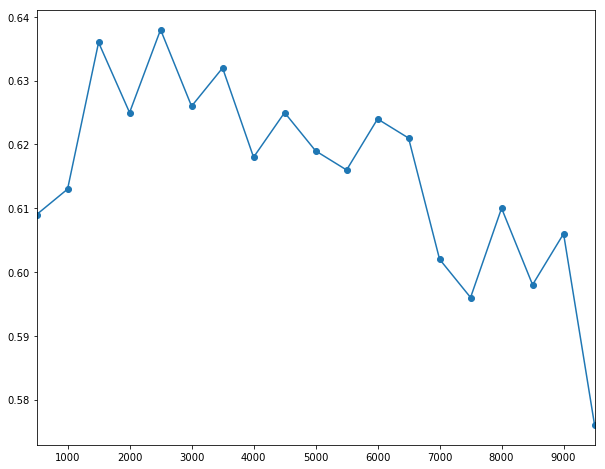

In [97]:
pd.Series(model.val_scores).plot(style='-o')



In [102]:
modeldo.train_loss

{500: 1.1911337, 1000: 1.3587893, 1500: 1.4203551, 2000: 1.2544757}

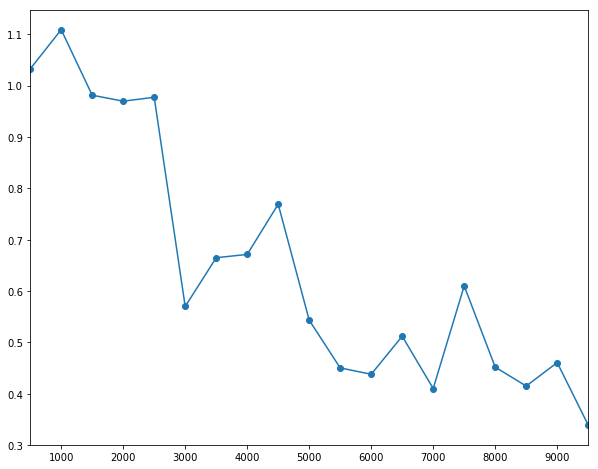

In [96]:
pd.Series(model.train_loss).plot(style='-o')

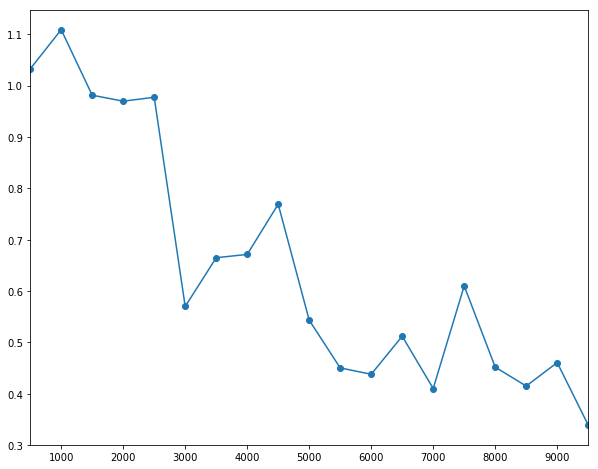

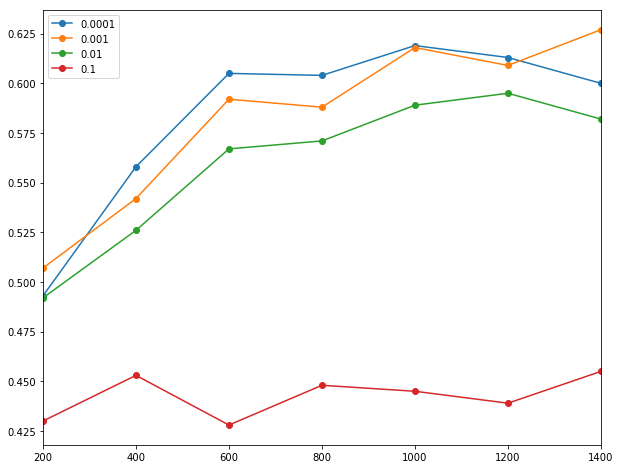

In [83]:
pd.DataFrame(score_dct).plot(style='-o')

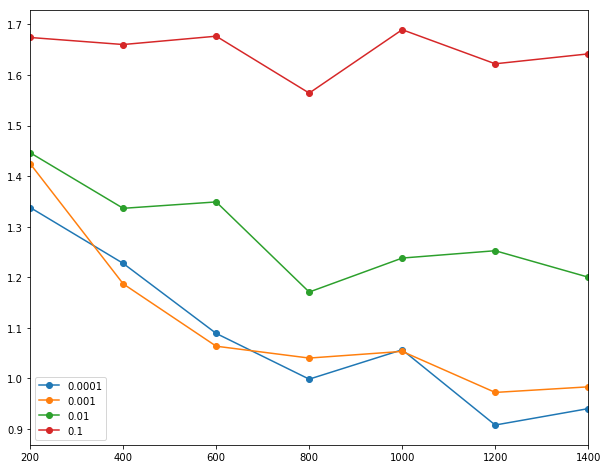

In [82]:
pd.DataFrame(loss_dct).plot(style='-o')

In [77]:
pd.DataFrame(loss_dct)

,0.0001,0.001,0.01,0.1
200,[1.48346],[1.42101],[1.4162],[1.67014]


In [ ]:
model = train_torchnet(data['X_train'], data['y_train'],
                         num_epochs=5, 
                       weight_decay=weight_decay,
                         print_every=200,
                         X_val=data['X_val'], y_val=data['y_val'],
                         filter_size=5,
                        use_cuda=True)

In [70]:
#pd.DataFrame(loss_dct)

In [62]:
model.val_scores

{}

In [55]:
torch_model.val_scores

{200: 0.12,
 400: 0.179,
 600: 0.196,
 800: 0.203,
 1000: 0.224,
 1200: 0.294,
 1400: 0.303,
 1600: 0.327,
 1800: 0.34,
 2000: 0.342,
 2200: 0.368,
 2400: 0.386}

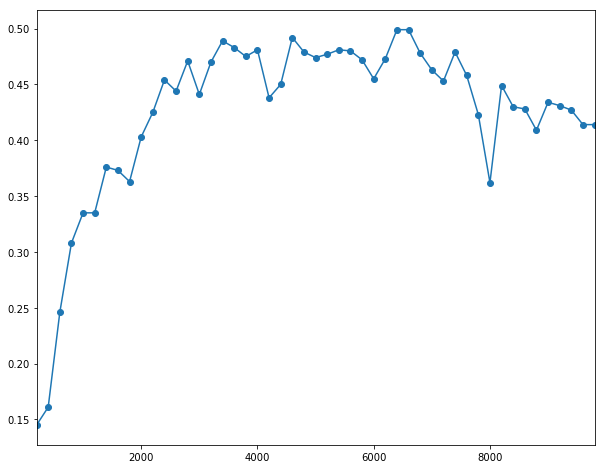

In [49]:
import pandas as pd
pd.Series(
    torch_model.val_scores
).plot(style='-o')

In [46]:
torch_model.val_scores

{200: 0.125, 400: 0.201}

In [29]:
%%time
torch_model.custom_scorer(data)

CPU times: user 136 ms, sys: 8 ms, total: 144 ms
Wall time: 146 ms


{'val': 0.179}

In [28]:
X.shape

(1000, 3, 32, 32)

In [ ]:
#for x,y in zip( batch(X[:30], n=10), batch(y[:30], n=10)):
    print(x,y)

In [ ]:
from cs231n.classifiers.conv_net import batch

In [ ]:
torch_model.funcy_scorer(X, y)

In [ ]:
%%time
torch_model = train_torchnet(data['X_train'], data['y_train'],
                             n_batches=1000,
                             weight_decay=.001,
                            use_cuda=True)
print(
    torch_model.funcy_scorer(data['X_val'], data['y_val'])
)

In [ ]:
%%time
print(
    torch_model.funcy_scorer(data['X_train'], data['y_train'])
)

In [ ]:
%%time
torch_model = train_torchnet(data['X_train'], data['y_train'],
                             n_batches=10,
                             weight_decay=0,
                            use_cuda=False)
print(
    torch_model.funcy_scorer(data['X_val'], data['y_val'])
)

In [ ]:
torch_model

In [ ]:
%%time


In [ ]:
torch_model

In [ ]:
torch_model = train_torchnet(X, y, n_batches=10, weight_decay=1e-2)
torch_model.funcy_scorer(X, y)

In [ ]:
!pwd

In [ ]:
preds = clf.predict(input_fn=eval_input_fn)

In [ ]:
tf.metrics.accuracy(y, ['classes'])

In [ ]:
plist = list(preds)

In [ ]:
import pandas as pd

In [ ]:
y

In [ ]:
#pd.DataFrame(plist).assign(y=y)

In [ ]:
X[0].shape